# Feature Engineering

In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading preprocessed dataset
data = pd.read_csv("C:\\Users\\shant\\Downloads\\quant-nasdaq-project\\data\\NASDAQ_Scaled_Full.csv")


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,0.011595,0.010764,0.014923,4143.069824,0.011753,0.135298
1,2014-01-03,0.010677,0.010124,0.014374,4131.910156,0.010855,0.125945
2,2014-01-06,0.009755,0.009071,0.012670,4113.680176,0.009389,0.207936
3,2014-01-07,0.009078,0.010541,0.014496,4153.180176,0.012566,0.206019
4,2014-01-08,0.011135,0.011626,0.015984,4165.609863,0.013566,0.214804


In [4]:
# Convert 'date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,0.011595,0.010764,0.014923,4143.069824,0.011753,0.135298
1,2014-01-03,0.010677,0.010124,0.014374,4131.910156,0.010855,0.125945
2,2014-01-06,0.009755,0.009071,0.012670,4113.680176,0.009389,0.207936
3,2014-01-07,0.009078,0.010541,0.014496,4153.180176,0.012566,0.206019
4,2014-01-08,0.011135,0.011626,0.015984,4165.609863,0.013566,0.214804


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2577 non-null   datetime64[ns]
 1   Open       2577 non-null   float64       
 2   High       2577 non-null   float64       
 3   Low        2577 non-null   float64       
 4   Close      2577 non-null   float64       
 5   Adj Close  2577 non-null   float64       
 6   Volume     2577 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 141.1 KB


## 1. Time-Based Features

In [6]:
# Extract time-based features
data['DayOfWeek'] = data['Date'].dt.dayofweek   # 0 = Monday
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter


In [7]:
from pandas.tseries.holiday import USFederalHolidayCalendar

calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=data['Date'].min(), end=data['Date'].max())

data['IsHoliday'] = data['Date'].isin(holidays).astype(int)


In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Quarter,IsHoliday
0,2014-01-02,0.011595,0.010764,0.014923,4143.069824,0.011753,0.135298,3,1,1,0
1,2014-01-03,0.010677,0.010124,0.014374,4131.910156,0.010855,0.125945,4,1,1,0
2,2014-01-06,0.009755,0.009071,0.012670,4113.680176,0.009389,0.207936,0,1,1,0
3,2014-01-07,0.009078,0.010541,0.014496,4153.180176,0.012566,0.206019,1,1,1,0
4,2014-01-08,0.011135,0.011626,0.015984,4165.609863,0.013566,0.214804,2,1,1,0


## 2. Rolling Averages and Moving Windows:

In [9]:
window_sizes = [3,6,9]

for window in window_sizes:
    data[f'rolling_mean_{window}'] = data['Close'].rolling(window).mean()
    data[f'rolling_std_{window}'] = data['Close'].rolling(window).std()
    data[f'rolling_min_{window}'] = data['Close'].rolling(window).min()
    data[f'rolling_max_{window}'] = data['Close'].rolling(window).max()


In [10]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Quarter,...,rolling_min_3,rolling_max_3,rolling_mean_6,rolling_std_6,rolling_min_6,rolling_max_6,rolling_mean_9,rolling_std_9,rolling_min_9,rolling_max_9
0,2014-01-02,0.011595,0.010764,0.014923,4143.069824,0.011753,0.135298,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,0.010677,0.010124,0.014374,4131.910156,0.010855,0.125945,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,0.009755,0.009071,0.012670,4113.680176,0.009389,0.207936,0,1,1,...,4113.680176,4143.069824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,0.009078,0.010541,0.014496,4153.180176,0.012566,0.206019,1,1,1,...,4113.680176,4153.180176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,0.011135,0.011626,0.015984,4165.609863,0.013566,0.214804,2,1,1,...,4113.680176,4165.609863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Lagged Features

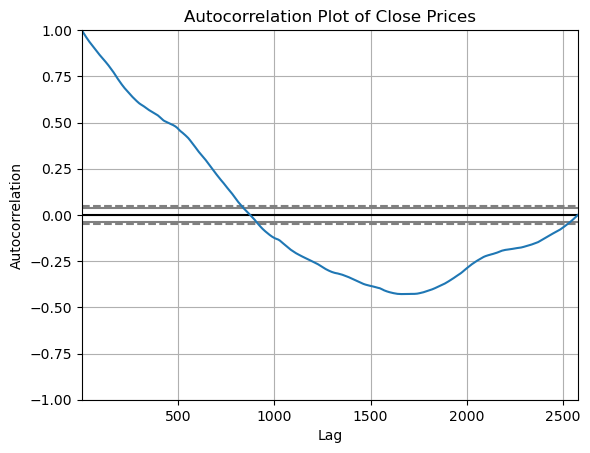

In [11]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Autocorrelation plot
autocorrelation_plot(data['Close'])
plt.title("Autocorrelation Plot of Close Prices")
plt.show()


In [12]:
from statsmodels.tsa.stattools import acf

# Use ACF to determine optimal lags
acf_vals = acf(data['Close'].dropna(), nlags=20)
print("ACF Values:", acf_vals)

ACF Values: [1.         0.99823385 0.99655456 0.99486109 0.99319107 0.99152989
 0.98984964 0.98825288 0.98659642 0.98507026 0.98344065 0.98182035
 0.98013946 0.97845227 0.97685722 0.97519762 0.97358585 0.97198925
 0.970474   0.96880198 0.96713056]


In [13]:
# Based on plot/manual inspection, add lag features
data['Close_t-1'] = data['Close'].shift(1)
data['Close_t-5'] = data['Close'].shift(5)
data['Close_t-10'] = data['Close'].shift(10)  # Optional deeper lag


In [14]:
# Display the dataframe with lagged features
print(data[['Date', 'Close', 'Close_t-1', 'Close_t-5','Close_t-10']].head())


        Date        Close    Close_t-1  Close_t-5  Close_t-10
0 2014-01-02  4143.069824          NaN        NaN         NaN
1 2014-01-03  4131.910156  4143.069824        NaN         NaN
2 2014-01-06  4113.680176  4131.910156        NaN         NaN
3 2014-01-07  4153.180176  4113.680176        NaN         NaN
4 2014-01-08  4165.609863  4153.180176        NaN         NaN


## 4. Interaction Features

In [15]:
# Create volatility and interaction feature
data['Volatility'] = data['High'] - data['Low']


In [16]:
# Interaction features
data['Volume_x_Volatility'] = data['Volume'] * data['Volatility']
data['Close_x_Volume'] = data['Close'] * data['Volume']
data['Range_x_Volume'] = (data['High'] - data['Low']) * data['Volume']


In [17]:
# Display the dataframe with interaction features
print(data[['Date', 'Close', 'Volatility', 'Volume_x_Volatility','Close_x_Volume','Range_x_Volume']].head())

        Date        Close  Volatility  Volume_x_Volatility  Close_x_Volume  \
0 2014-01-02  4143.069824   -0.004159            -0.000563      560.549704   
1 2014-01-03  4131.910156   -0.004250            -0.000535      520.392321   
2 2014-01-06  4113.680176   -0.003600            -0.000748      855.382146   
3 2014-01-07  4153.180176   -0.003955            -0.000815      855.634655   
4 2014-01-08  4165.609863   -0.004358            -0.000936      894.787803   

   Range_x_Volume  
0       -0.000563  
1       -0.000535  
2       -0.000748  
3       -0.000815  
4       -0.000936  


## Domain-Specific Features

In [18]:
# If you have SP500 or sector index data, merge it
# For now, simulate an external index if unavailable
data['SP500_dummy'] = data['Close'].rolling(3).mean() + np.random.normal(0, 0.01, len(data))
data['Close_vs_SP500'] = data['Close'] - data['SP500_dummy']


In [19]:
print(data[['Date', 'Close', 'SP500_dummy', 'Close_vs_SP500']].head())

        Date        Close  SP500_dummy  Close_vs_SP500
0 2014-01-02  4143.069824          NaN             NaN
1 2014-01-03  4131.910156          NaN             NaN
2 2014-01-06  4113.680176  4129.564800      -15.884624
3 2014-01-07  4153.180176  4132.904090       20.276086
4 2014-01-08  4165.609863  4144.147525       21.462338


In [20]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
DayOfWeek               0
Month                   0
Quarter                 0
IsHoliday               0
rolling_mean_3          2
rolling_std_3           2
rolling_min_3           2
rolling_max_3           2
rolling_mean_6          5
rolling_std_6           5
rolling_min_6           5
rolling_max_6           5
rolling_mean_9          8
rolling_std_9           8
rolling_min_9           8
rolling_max_9           8
Close_t-1               1
Close_t-5               5
Close_t-10             10
Volatility              0
Volume_x_Volatility     0
Close_x_Volume          0
Range_x_Volume          0
SP500_dummy             2
Close_vs_SP500          2
dtype: int64

In [21]:
# Drop NA rows created by rolling/lags
# Replace infinite values with NaN, then drop them
data.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = data.dropna()


In [22]:
df_clean.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
DayOfWeek              0
Month                  0
Quarter                0
IsHoliday              0
rolling_mean_3         0
rolling_std_3          0
rolling_min_3          0
rolling_max_3          0
rolling_mean_6         0
rolling_std_6          0
rolling_min_6          0
rolling_max_6          0
rolling_mean_9         0
rolling_std_9          0
rolling_min_9          0
rolling_max_9          0
Close_t-1              0
Close_t-5              0
Close_t-10             0
Volatility             0
Volume_x_Volatility    0
Close_x_Volume         0
Range_x_Volume         0
SP500_dummy            0
Close_vs_SP500         0
dtype: int64

## 5. Feature Selection

In [23]:

# Correlation with target
corr_with_target = df_clean.corr()['Close'].sort_values(ascending=False)
print("Correlation with Close:\n", corr_with_target)

Correlation with Close:
 Close                  1.000000
Adj Close              1.000000
Low                    0.999817
High                   0.999787
SP500_dummy            0.999672
rolling_mean_3         0.999672
Open                   0.999600
rolling_min_3          0.999595
rolling_max_3          0.999495
Close_t-1              0.999372
rolling_mean_6         0.999142
rolling_min_6          0.998990
rolling_max_6          0.998692
rolling_mean_9         0.998629
rolling_min_9          0.998510
rolling_max_9          0.997909
Close_t-5              0.997240
Close_t-10             0.994686
Date                   0.928701
Close_x_Volume         0.921759
Volume                 0.847221
rolling_std_9          0.613598
rolling_std_6          0.584963
rolling_std_3          0.516180
Volatility             0.446047
Volume_x_Volatility    0.380287
Range_x_Volume         0.380287
Close_vs_SP500         0.044541
Month                  0.021406
Quarter                0.017268
IsHoliday      

In [24]:
df_clean = df_clean.drop(columns=['Adj Close'])


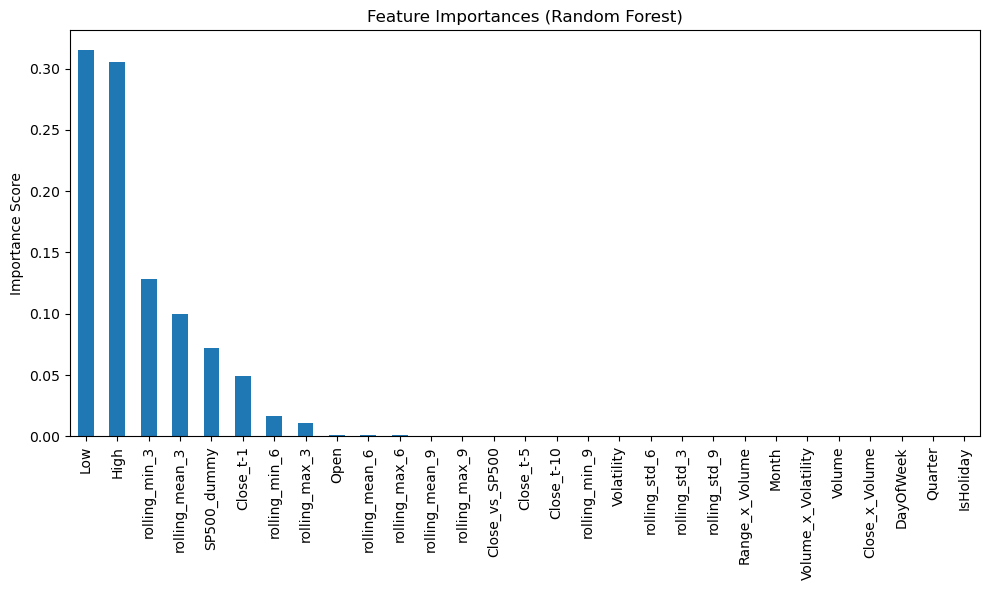

In [25]:
from sklearn.ensemble import RandomForestRegressor

from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

# Tree-based feature importance
feature_cols = df_clean.columns.difference(['Close', 'Date'])  # Cleaned up
X_fs = df_clean[feature_cols]
y_fs = df_clean['Close']


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_fs, y_fs)

importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [26]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)
rfe.fit(X_fs, y_fs)

# Get selected features
rfe_selected = X_fs.columns[rfe.support_]
print("RFE Selected Features:", rfe_selected.tolist())


RFE Selected Features: ['Close_t-1', 'High', 'Low', 'Open', 'SP500_dummy', 'rolling_max_3', 'rolling_mean_3', 'rolling_mean_6', 'rolling_min_3', 'rolling_min_6']


In [27]:
# Correlation Analysis on cleaned features
corr_matrix = X_fs.corr()

# Find highly correlated feature pairs (absolute correlation > 0.9)
high_corr_pairs = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.add((corr_matrix.columns[i], corr_matrix.columns[j]))

# Drop one feature from each correlated pair (arbitrarily second one)
to_remove = {pair[1] for pair in high_corr_pairs}
correlation_selected_features = [col for col in X_fs.columns if col not in to_remove]

print("Selected features using Correlation Analysis:", correlation_selected_features)


Selected features using Correlation Analysis: ['Close_vs_SP500', 'DayOfWeek', 'IsHoliday', 'Quarter', 'Volume', 'Volume_x_Volatility', 'rolling_min_9', 'rolling_std_3', 'rolling_std_6', 'rolling_std_9']


In [28]:
#Feature Importance from Tree-Based Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_fs, y_fs)

# Get feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_fs.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Select top 10 important features (adjust based on your needs)
tree_selected_features = feature_importance_df['Feature'].head(10).tolist()
print("Selected features using Tree-Based Model:", tree_selected_features)


Selected features using Tree-Based Model: ['Low', 'High', 'rolling_min_3', 'rolling_mean_3', 'SP500_dummy', 'Close_t-1', 'rolling_min_6', 'rolling_max_3', 'Open', 'rolling_mean_6']


In [29]:
# Combine features from all methods
final_selected_features = [
    'Close_t-1',          # Lagged price for temporal dependency
    'rolling_mean_3',     # Short-term trend
    'rolling_min_3',      # Short-term price floor
    'rolling_std_3',      # Volatility
    'Volume',             # Trading activity
    'Close_vs_SP500',     # Market context
    'Volume_x_Volatility', # Interaction term
    'DayOfWeek',          # Calendar effect (required)
    'IsHoliday'           # Holiday indicator (required)
]

In [30]:

print("Final Selected Features:", final_selected_features)


Final Selected Features: ['Close_t-1', 'rolling_mean_3', 'rolling_min_3', 'rolling_std_3', 'Volume', 'Close_vs_SP500', 'Volume_x_Volatility', 'DayOfWeek', 'IsHoliday']


In [31]:
X_final = df_clean[final_selected_features]
y_final = df_clean['Close']


In [32]:
final_df = pd.concat([X_final, y_final], axis=1)
final_df.to_csv("C:\\Users\\shant\\Downloads\\quant-nasdaq-project\\data\\final_features_model_input.csv", index=False)